In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
## Previewing the data 

In [4]:
df_train.head()

date_time  deg_C  relative_humidity  absolute_humidity  sensor_1  \
0  2010-03-10 18:00:00   13.1               46.0             0.7578    1387.2   
1  2010-03-10 19:00:00   13.2               45.3             0.7255    1279.1   
2  2010-03-10 20:00:00   12.6               56.2             0.7502    1331.9   
3  2010-03-10 21:00:00   11.0               62.4             0.7867    1321.0   
4  2010-03-10 22:00:00   11.9               59.0             0.7888    1272.0   

   sensor_2  sensor_3  sensor_4  sensor_5  target_carbon_monoxide  \
0    1087.8    1056.0    1742.8    1293.4                     2.5   
1     888.2    1197.5    1449.9    1010.9                     2.1   
2     929.6    1060.2    1586.1    1117.0                     2.2   
3     929.0    1102.9    1536.5    1263.2                     2.2   
4     852.7    1180.9    1415.5    1132.2                     1.5   

   target_benzene  target_nitrogen_oxides  
0            12.0                   167.7  
1             9.9                    98.9  
2             9.2                   127.1  
3             9.7                   177.2  
4             6.4                   121.8

In [5]:
df_test.head()

date_time  deg_C  relative_humidity  absolute_humidity  sensor_1  \
0  2011-01-01 00:00:00    8.0               41.3             0.4375    1108.8   
1  2011-01-01 01:00:00    5.1               51.7             0.4564    1249.5   
2  2011-01-01 02:00:00    5.8               51.5             0.4689    1102.6   
3  2011-01-01 03:00:00    5.0               52.3             0.4693    1139.7   
4  2011-01-01 04:00:00    4.5               57.5             0.4650    1022.4   

   sensor_2  sensor_3  sensor_4  sensor_5  
0     745.7     797.1     880.0    1273.1  
1     864.9     687.9     972.8    1714.0  
2     878.0     693.7     941.9    1300.8  
3     916.2     725.6    1011.0    1283.0  
4     838.5     871.5     967.0    1142.3

In [6]:
### Getting the shape of the data frames
df_train.shape, df_test.shape

((7111, 12), (2247, 9))

## 1.  Concatenating the data

In [7]:

df_full = pd.concat([df_train, df_test])
df_full['date_time'] = pd.to_datetime(df_full['date_time']  )
df_full['year'] = df_full['date_time'].dt.year
df_full['month'] = df_full['date_time'].dt.month
df_full['day'] = df_full['date_time'].dt.day
df_full.head()

date_time  deg_C  relative_humidity  absolute_humidity  sensor_1  \
0 2010-03-10 18:00:00   13.1               46.0             0.7578    1387.2   
1 2010-03-10 19:00:00   13.2               45.3             0.7255    1279.1   
2 2010-03-10 20:00:00   12.6               56.2             0.7502    1331.9   
3 2010-03-10 21:00:00   11.0               62.4             0.7867    1321.0   
4 2010-03-10 22:00:00   11.9               59.0             0.7888    1272.0   

   sensor_2  sensor_3  sensor_4  sensor_5  target_carbon_monoxide  \
0    1087.8    1056.0    1742.8    1293.4                     2.5   
1     888.2    1197.5    1449.9    1010.9                     2.1   
2     929.6    1060.2    1586.1    1117.0                     2.2   
3     929.0    1102.9    1536.5    1263.2                     2.2   
4     852.7    1180.9    1415.5    1132.2                     1.5   

   target_benzene  target_nitrogen_oxides  year  month  day  
0            12.0                   167.7  2010      3   10  
1             9.9                    98.9  2010      3   10  
2             9.2                   127.1  2010      3   10  
3             9.7                   177.2  2010      3   10  
4             6.4                   121.8  2010      3   10

## Filter df_filtered:  for  where the relative humidity is >50 and absolute humidity <1.4


In [8]:
df_filtered = df_full[(df_full['relative_humidity'] > 50) & (df_full['absolute_humidity'] < 1.4)].reset_index(drop=True, inplace=False)
df_filtered.head()

date_time  deg_C  relative_humidity  absolute_humidity  sensor_1  \
0 2010-03-10 20:00:00   12.6               56.2             0.7502    1331.9   
1 2010-03-10 21:00:00   11.0               62.4             0.7867    1321.0   
2 2010-03-10 22:00:00   11.9               59.0             0.7888    1272.0   
3 2010-03-10 23:00:00   11.2               56.8             0.7848    1220.9   
4 2010-03-11 00:00:00   10.7               55.7             0.7603    1244.2   

   sensor_2  sensor_3  sensor_4  sensor_5  target_carbon_monoxide  \
0     929.6    1060.2    1586.1    1117.0                     2.2   
1     929.0    1102.9    1536.5    1263.2                     2.2   
2     852.7    1180.9    1415.5    1132.2                     1.5   
3     697.5    1417.2    1462.6     949.0                     1.2   
4     669.3    1491.2    1413.0     769.6                     1.2   

   target_benzene  target_nitrogen_oxides  year  month  day  
0             9.2                   127.1  2010      3   10  
1             9.7                   177.2  2010      3   10  
2             6.4                   121.8  2010      3   10  
3             4.4                    88.1  2010      3   10  
4             3.7                    59.5  2010      3   11

## Step 3: Apply


In [9]:
def step4(row, median_col4, mean_col4_by_month):
    if row['sensor_4'] < median_col4:
        return row['sensor_2'] * row['sensor_3']
    else:
        return row['sensor_2'] * row['sensor_4'] - mean_col4_by_month[row.name]


# Apply the function

median_col4 = df_filtered['sensor_4'].median()
mean_col4_by_month = df_filtered.groupby('month')['sensor_4'].transform('mean')

df_filtered['apply_step3'] = df_filtered.apply(
    step4, axis=1, args=(median_col4, mean_col4_by_month)
)


## Step 4 Groupby: 

In [10]:
df_group = df_full.groupby(['year', 'month', 'day'])['deg_C'].agg(['mean', 'median', 'min', 'max', 'count']).reset_index()
df_group

year  month  day       mean  median   min   max  count
0    2010      3   10  12.166667   12.25  11.0  13.2      6
1    2010      3   11   9.762500   10.05   7.7  11.4     24
2    2010      3   12  11.133333   11.70   5.7  16.2     24
3    2010      3   13  12.779167   14.40   6.2  19.0     24
4    2010      3   14  15.800000   15.45  10.0  22.7     24
..    ...    ...  ...        ...     ...   ...   ...    ...
386  2011      3   31  17.583333   17.40  12.0  23.9     24
387  2011      4    1  15.737500   15.35  12.6  20.4     24
388  2011      4    2  15.458333   14.20  10.6  22.6     24
389  2011      4    3  18.341667   15.95   8.3  30.9     24
390  2011      4    4  16.973333   14.20   9.1  29.1     15

[391 rows x 8 columns]

# Step 5: Create column in df_full

In [11]:
import numpy as np

# Define the function to create categories based on splits
def apply_splits(series:pd.Series, splits:list, labels:list=None):
    """
    Categorizes a pandas Series based on given splits.
    
    Parameters:
    - series: pandas Sefries to be categorized.
    - splits: List of float values defining the split intervals (must start at 0 and end at 1).
    - labels: Optional list of labels for each interval. If not provided, categories are numbered.
    
    Returns:
    - pandas Series with categorized values.
    """
    if not splits[0] == 0 or not splits[-1] == 1:
        raise ValueError("Splits must start at 0 and end at 1.")
    if labels and len(labels) != len(splits) - 1:
        raise ValueError("Number of labels must match the number of intervals.")
    
    bins = splits
    if not labels:
        labels = range(len(bins) - 1)
    
    return pd.cut(series, bins=bins, labels=labels, right=False)

# Example DataFrame for demonstration
df_full['sensor1_max_normed'] = df_full['sensor_1']/df_full['sensor_1'].max()
df_full['sensor2_max_normed'] = df_full['sensor_2']/df_full['sensor_2'].max()

# Define the splits
splits = [0, 0.2, 0.5, 0.8, 0.85, 1]

# Apply the function to sensor columns
df_full['Truth'] = apply_splits(df_full['sensor1_max_normed'], splits)
df_full['Predicted'] = apply_splits(df_full['sensor2_max_normed'], splits)


## Step 6-A: How many days overlap in the two latest years?

In [12]:
# Step 6 

df_2011 = df_full[df_full['year']==2011]
df_2010 = df_full[df_full['year']==2010]
overlap_days = df_2011[['year', 'month', 'day']].drop_duplicates().merge(df_2010[['year', 'month', 'day']].drop_duplicates(), on=['month', 'day'], how='inner')
print(f'Number of days overlapped: {len(overlap_days)}')


Number of days overlapped: 26


In [13]:
df_2010.shape, df_2011.shape

((7110, 19), (2248, 19))

## Step 6-B: What is the average of the daily difference of abs humidity?

In [14]:
df_2010[['year', 'month', 'day']].drop_duplicates().shape, df_2011[['year', 'month', 'day']].drop_duplicates().shape

((297, 3), (94, 3))

In [15]:
df_2010_abs_hum_agg = df_2010.groupby(['year', 'month', 'day'])['absolute_humidity'].mean().reset_index()
df_2011_abs_hum_agg = df_2011.groupby(['year', 'month', 'day'])['absolute_humidity'].mean().reset_index()

In [16]:
tmp = df_2010_abs_hum_agg.merge(df_2011_abs_hum_agg, on=['month', 'day'])
tmp['absolute_humidity_diff_yoy'] = tmp['absolute_humidity_y'] - tmp['absolute_humidity_x'] 
print(f'Average of Daily Difference of abs humidity: {tmp["absolute_humidity_diff_yoy"].mean()}')

Average of Daily Difference of abs humidity: 0.0630267307692308


## Step 6-C: What is the difference in average of sensor 1 data between the two years?

In [17]:
overlap_days = overlap_days.drop(columns='year_y').rename(columns={"year_x":"year"})

In [18]:
tmp_2010 = df_2010.merge(overlap_days, on=['month', 'day'], how='inner')
tmp_2011 = df_2011.merge(overlap_days, on=['month', 'day'], how='inner')


In [19]:
diff_avg_sensor1 = tmp_2011['sensor_1'].mean() - tmp_2010['sensor_1'].mean()
print(f'Difference in average of Sensor1: {diff_avg_sensor1}')

Difference in average of Sensor1: -75.89999597520728


# Step 7-A: Histogram of absolute humidity

In [20]:
import seaborn as sns
sns.histplot(df_full['absolute_humidity'])

<Axes: xlabel='absolute_humidity', ylabel='Count'>

# Step 7-B: Sensor 1 - 5 histograms overlaid on same figure

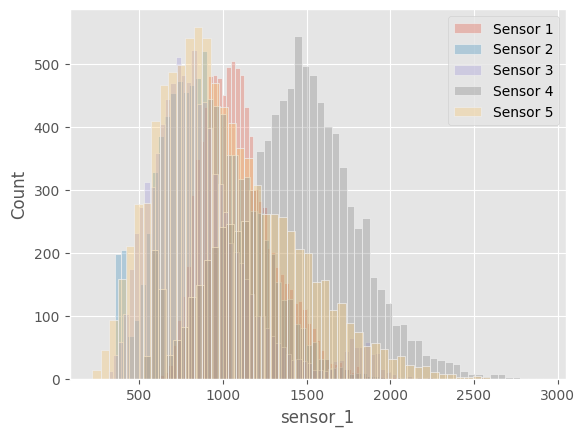

In [21]:
for i in range(1,6): 
    sns.histplot(df_full[f'sensor_{i}'], alpha=0.3, label=f'Sensor {i}')
plt.legend()
    

# Step 7-C: Scatter plot of sensor 1 vs sensor 2 coloured blue if weekday, red otherwise

In [22]:
df_full['day_name'] = df_full['date_time'].dt.day_name()
df_full['day_type'] = np.where(~df_full['day_name'].isin(['Saturday', 'Sunday']), 'weekday', 'weekend')

custom_palette = {'weekday': 'blue', 'weekend': 'red'} 

In [23]:
sns.scatterplot(data=df_full, x='sensor_2', y='sensor_1', 
                hue='day_type',alpha=0.2,palette=custom_palette)

<Axes: xlabel='sensor_2', ylabel='sensor_1'>

# Step 7-D: Correlation matrix of all sensors against each other with histograms of the sensor values along diagonal

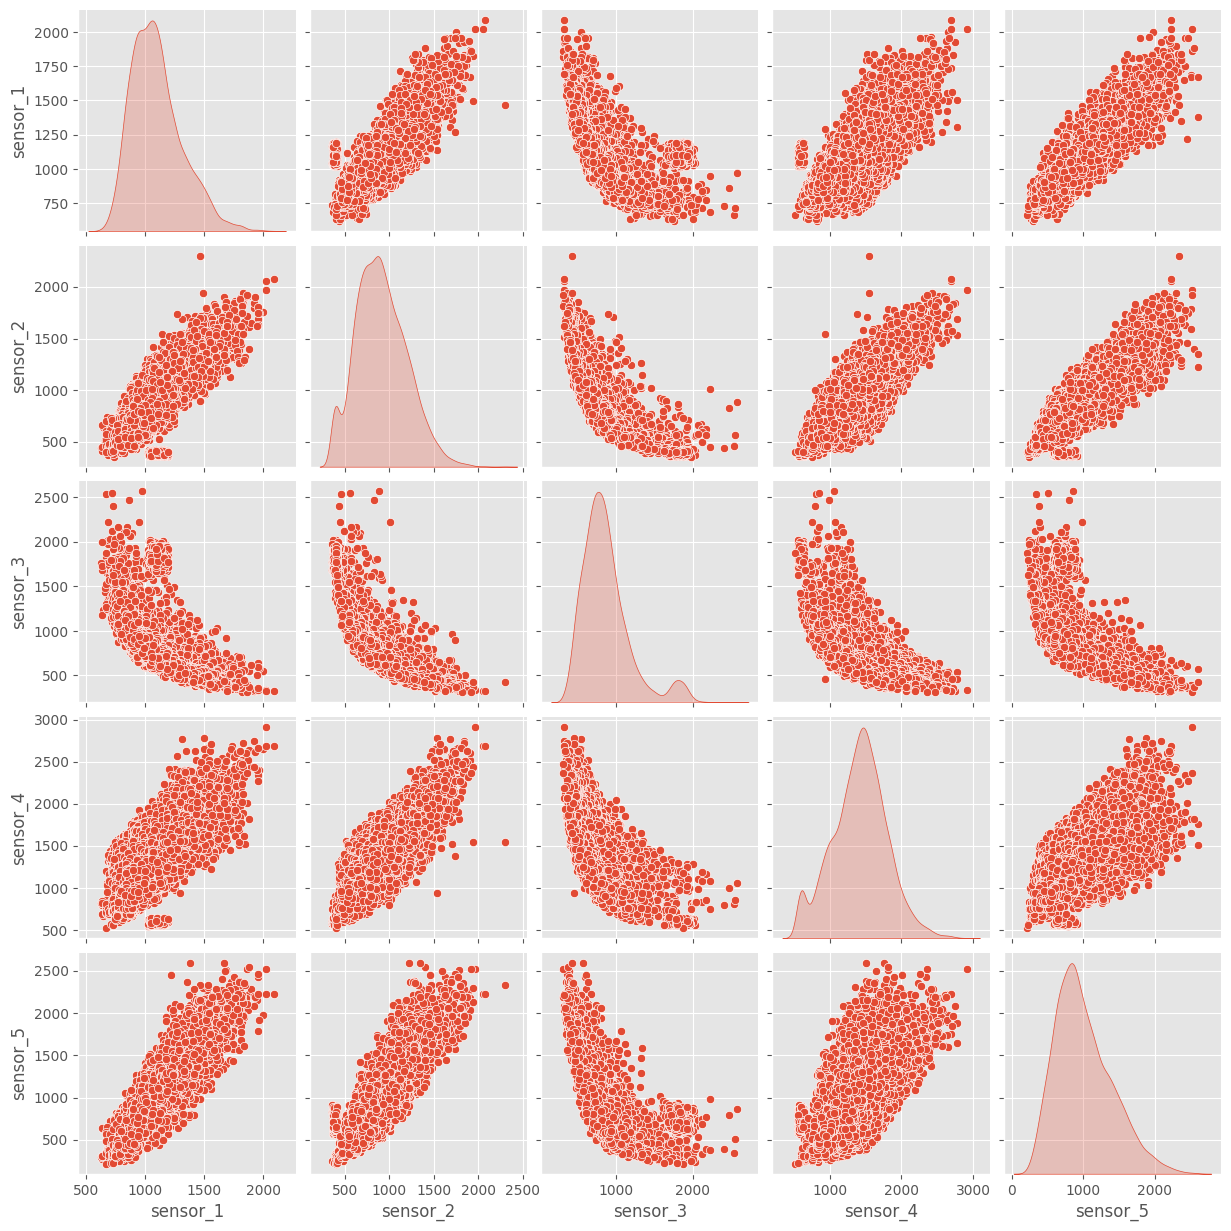

In [24]:
sns.pairplot(df_full[['sensor_1', 'sensor_2','sensor_3','sensor_4','sensor_5']], diag_kind='kde')

In [25]:
df_full[['sensor_1', 'sensor_2','sensor_3','sensor_4','sensor_5']].corr()

sensor_1  sensor_2  sensor_3  sensor_4  sensor_5
sensor_1  1.000000  0.796913 -0.587970  0.583242  0.861892
sensor_2  0.796913  1.000000 -0.802304  0.792547  0.848273
sensor_3 -0.587970 -0.802304  1.000000 -0.637138 -0.702862
sensor_4  0.583242  0.792547 -0.637138  1.000000  0.577118
sensor_5  0.861892  0.848273 -0.702862  0.577118  1.000000

# Step 7-E: confusion matrix of predicted vs truth

In [26]:
df_full['Predicted'].unique()

[1, 2, 0, 3, 4, NaN]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

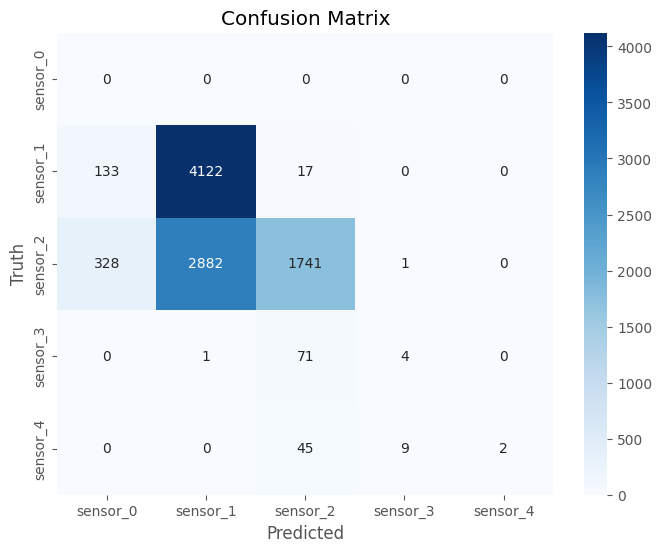

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
tmp = df_full[(~df_full['Truth'].isnull()) & (~df_full['Predicted'].isnull())]
cm = confusion_matrix(tmp['Truth'], tmp['Predicted'])
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
class_labels = [0,1,2,3,4]
class_labels = [f'sensor_{x}' for x in class_labels]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

## Part 8: Create data split: Create a column “train_val_set” which contains a random 70% denoted “train”/30% “val” split of the data from the train.csv ensure that each day is not split
between sets.

In [28]:
df_train['date'] = pd.to_datetime(df_train['date_time']).dt.date
unique_dates = df_train['date'].unique()
shuffled_dates = np.random.RandomState(42).permutation(unique_dates)

# Determine the split point
split_idx = int(len(shuffled_dates) * 0.7)

# Assign 'train' or 'val' to each date
date_to_set = {date: 'train' if i < split_idx else 'val' for i, date in enumerate(shuffled_dates)}
df_train['set'] = df_train['date'].map(date_to_set)


In [29]:
# ensure that each day is not split between sets.
df_train.groupby('date')['set'].nunique().value_counts()

set
1    298
Name: count, dtype: int64

In [30]:
df_train['set'].value_counts(1)

set
train    0.69948
val      0.30052
Name: proportion, dtype: float64

### Dataframes into CSVs

In [31]:
df_full.to_csv('df_full.csv', index=False)
df_group.to_csv('df_group.csv', index=False)
df_filtered.to_csv('df_filtered.csv', index=False)

